In [1]:
import numpy as np
import time
from qiskit.aqua.operators import WeightedPauliOperator, commutator
from qiskit.chemistry import FermionicOperator
import TensorAnalyticFermionicCommutator as TAFC

/usr/local/lib/python3.6/dist-packages/qiskit/version.py:116: UserWarning: Command ['/usr/bin/python3', '-m', 'pip', 'freeze'] exited with code 1: Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/pip/__main__.py", line 16, in <module>
    from pip._internal.main import main as _main  # isort:skip # noqa
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/main.py", line 8, in <module>
    import locale
  File "/usr/lib/python3.6/locale.py", line 16, in <module>
    import re
  File "/usr/lib/python3.6/re.py", line 142, in <module>
    class RegexFlag(enum.IntFlag):
AttributeError: module 'enum' has no attribute 'IntFlag'
Error in sys.excepthook:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/apport_python_hook.py", line 53, in apport_exc

In [2]:
# commutator of [op1,op2]
nferm = 6
h1 = np.random.random((nferm,nferm))
#h12 = np.random.random((nferm,nferm))
h2 = np.random.random((nferm,nferm,nferm,nferm))
h1z = np.zeros((nferm,nferm))

ferop = FermionicOperator(h1)
ferop2 = FermionicOperator(h1z,h2)

t0 = time.time()
#ferop2 = FermionicOperator(h12)
A = ferop.mapping('jordan_wigner')
B = ferop2.mapping('jordan_wigner')
old = commutator(A,B)
t1 = time.time()
print('Computational time of QisKit routine:',t1-t0)

t0 = time.time()
ferop3 = TAFC.ten_commutator(ferop,ferop2)
new = ferop3.mapping('jordan_wigner')
t1 = time.time()
print('Computational time of new routine:',t1-t0)

#no output => old == new : meaning new procedure gives the same result as existing one, but faster:)
for pauli in old.sub(new).paulis:
    if np.abs(pauli[0])>1e-12:
        print(pauli[0],pauli[1])

Computational time of QisKit routine: 8.964168071746826
Computational time of new routine: 0.40400052070617676


In [3]:
# commutator of <op1,op2,op3>

nferm = 5
h1a = np.random.random((nferm,nferm))
h1b = np.random.random((nferm,nferm))
h2c = np.random.random((nferm,nferm,nferm,nferm))
h1c = np.zeros((nferm,nferm))

ferop_a = FermionicOperator(h1a)
ferop_c = FermionicOperator(h1c,h2c)
ferop_b = FermionicOperator(h1b)

t0 = time.time()
A = ferop_a.mapping('jordan_wigner')
B = ferop_b.mapping('jordan_wigner')
C = ferop_c.mapping('jordan_wigner')
old = commutator(A,C,B)
t1 = time.time()
print('Computational time of QisKit routine:',t1-t0)

t0 = time.time()
ferop3 = TAFC.ten_commutator(ferop_a,ferop_c,ferop_b)
new = ferop3.mapping('jordan_wigner')
t1 = time.time()
print('Computational time of new routine:',t1-t0)

#no output => old == new : meaning new procedure gives the same result as existing one, but faster:)
for pauli in old.sub(new).paulis:
    if np.abs(pauli[0])>1e-12:
        print(pauli[0],pauli[1])

Computational time of QisKit routine: 12.088197946548462
Computational time of new routine: 0.37032318115234375


In [5]:
# Performance comparison [1 body term, 1 body term] nferm: 2-9

told = []
tnew = []
for nferm in range(2,10):
    print("----------: # fermions = ",nferm, "---------")
    h1 = np.random.random((nferm,nferm))
    h12 = np.random.random((nferm,nferm))    
    ferop = FermionicOperator(h1)
    ferop2 = FermionicOperator(h12)
    
    t0 = time.time()
    A = ferop.mapping('jordan_wigner')
    B = ferop2.mapping('jordan_wigner')
    old = commutator(A,B)
    t1 = time.time()
    print('Computational time of QisKit routine:',t1-t0)
    told.append(t1-t0)

    t0 = time.time()
    ferop3 = TAFC.ten_commutator(ferop,ferop2)
    new = ferop3.mapping('jordan_wigner')
    t1 = time.time()
    print('Computational time of new routine:',t1-t0)
    tnew.append(t1-t0)
    
    #no output => old == new : meaning new procedure gives the same result as existing one, but faster:)
    for pauli in old.sub(new).paulis:
        if np.abs(pauli[0])>1e-12:
            print(pauli[0],pauli[1])    

----------: # fermions =  2 ---------
Computational time of QisKit routine: 0.7117838859558105
Computational time of new routine: 0.36015987396240234
----------: # fermions =  3 ---------
Computational time of QisKit routine: 0.7417621612548828
Computational time of new routine: 0.35936784744262695
----------: # fermions =  4 ---------
Computational time of QisKit routine: 0.8123557567596436
Computational time of new routine: 0.3596227169036865
----------: # fermions =  5 ---------
Computational time of QisKit routine: 1.053588628768921
Computational time of new routine: 0.35884952545166016
----------: # fermions =  6 ---------
Computational time of QisKit routine: 1.7880783081054688
Computational time of new routine: 0.36786961555480957
----------: # fermions =  7 ---------
Computational time of QisKit routine: 4.016714334487915
Computational time of new routine: 0.3633270263671875
----------: # fermions =  8 ---------
Computational time of QisKit routine: 9.823362112045288
Computatio

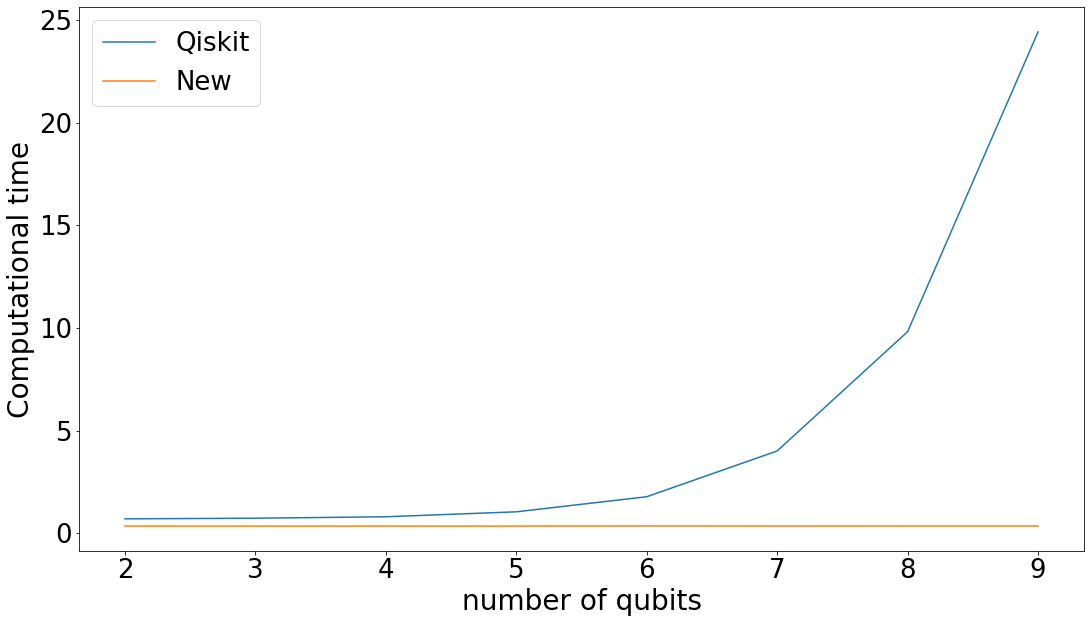

In [6]:
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
rcParams.update({'font.size': 26})
plt.xlabel('number of qubits',fontsize=28)
plt.ylabel('Computational time',fontsize=28, color='black')

plt.plot(range(2,10),told, label='Qiskit')
plt.plot(range(2,10),tnew, label='New')
plt.legend()
plt.show()

In [8]:
# Performance comparison [1 body term, 2 body term] nferm: 2-7

told = []
tnew = []
for nferm in range(2,8):
    print("----------: # fermions = ",nferm, "---------")
    h1 = np.random.random((nferm,nferm))
    h2 = np.random.random((nferm,nferm,nferm,nferm))
    h1z = np.zeros((nferm,nferm))
    ferop = FermionicOperator(h1)
    ferop2 = FermionicOperator(h1z,h2)
    
    t0 = time.time()
    A = ferop.mapping('jordan_wigner')
    B = ferop2.mapping('jordan_wigner')
    old = commutator(A,B)
    t1 = time.time()
    print('Computational time of QisKit routine:',t1-t0)
    told.append(t1-t0)

    t0 = time.time()
    ferop3 = TAFC.ten_commutator(ferop,ferop2)
    new = ferop3.mapping('jordan_wigner')
    t1 = time.time()
    print('Computational time of new routine:',t1-t0)
    tnew.append(t1-t0)
    
    #no output => old == new : meaning new procedure gives the same result as existing one, but faster:)
    for pauli in old.sub(new).paulis:
        if np.abs(pauli[0])>1e-12:
            print(pauli[0],pauli[1]) 

----------: # fermions =  2 ---------
Computational time of QisKit routine: 0.7818772792816162
Computational time of new routine: 0.3940730094909668
----------: # fermions =  3 ---------
Computational time of QisKit routine: 0.8159327507019043
Computational time of new routine: 0.3905303478240967
----------: # fermions =  4 ---------
Computational time of QisKit routine: 1.0500876903533936
Computational time of new routine: 0.39597487449645996
----------: # fermions =  5 ---------
Computational time of QisKit routine: 2.5493276119232178
Computational time of new routine: 0.4090850353240967
----------: # fermions =  6 ---------
Computational time of QisKit routine: 8.846311330795288
Computational time of new routine: 0.4523448944091797
----------: # fermions =  7 ---------
Computational time of QisKit routine: 45.91460919380188
Computational time of new routine: 0.6138925552368164


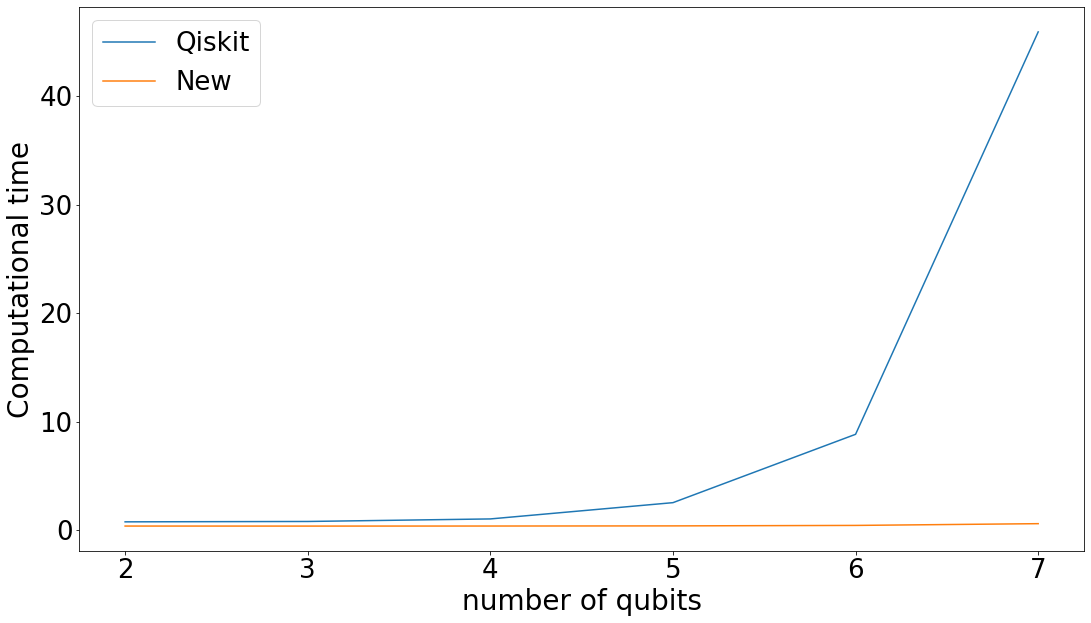

In [9]:
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
rcParams.update({'font.size': 26})
plt.xlabel('number of qubits',fontsize=28)
plt.ylabel('Computational time',fontsize=28, color='black')

plt.plot(range(2,8),told, label='Qiskit')
plt.plot(range(2,8),tnew, label='New')
plt.legend()
plt.show()

In [10]:
# Performance comparison [1 body term, 2 body term, 1 body term] nferm: 2-7

told = []
tnew = []
for nferm in range(2,8):
    print("----------: # fermions = ",nferm, "---------")    
    h1a = np.random.random((nferm,nferm))
    h1b = np.random.random((nferm,nferm))
    h2c = np.random.random((nferm,nferm,nferm,nferm))
    h1c = np.zeros((nferm,nferm))

    ferop_a = FermionicOperator(h1a)
    ferop_c = FermionicOperator(h1c,h2c)
    ferop_b = FermionicOperator(h1b)

    
    t0 = time.time()
    A = ferop_a.mapping('jordan_wigner')
    B = ferop_b.mapping('jordan_wigner')
    C = ferop_c.mapping('jordan_wigner')
    old = commutator(A,C,B)
    t1 = time.time()
    print('Computational time of QisKit routine:',t1-t0)
    told.append(t1-t0)

    t0 = time.time()
    ferop3 = TAFC.ten_commutator(ferop_a,ferop_c,ferop_b)
    new = ferop3.mapping('jordan_wigner')
    t1 = time.time()
    print('Computational time of new routine:',t1-t0)
    tnew.append(t1-t0)
    
    #no output => old == new : meaning new procedure gives the same result as existing one, but faster:)
    for pauli in old.sub(new).paulis:
        if np.abs(pauli[0])>1e-12:
            print(pauli[0],pauli[1])

----------: # fermions =  2 ---------
Computational time of QisKit routine: 1.2146587371826172
Computational time of new routine: 0.40137147903442383
----------: # fermions =  3 ---------
Computational time of QisKit routine: 1.4059038162231445
Computational time of new routine: 0.3962881565093994
----------: # fermions =  4 ---------
Computational time of QisKit routine: 3.008378028869629
Computational time of new routine: 0.4065735340118408
----------: # fermions =  5 ---------
Computational time of QisKit routine: 12.19400930404663
Computational time of new routine: 0.42234039306640625
----------: # fermions =  6 ---------
Computational time of QisKit routine: 58.63370633125305
Computational time of new routine: 0.46022582054138184
----------: # fermions =  7 ---------
Computational time of QisKit routine: 289.293390750885
Computational time of new routine: 0.6639106273651123


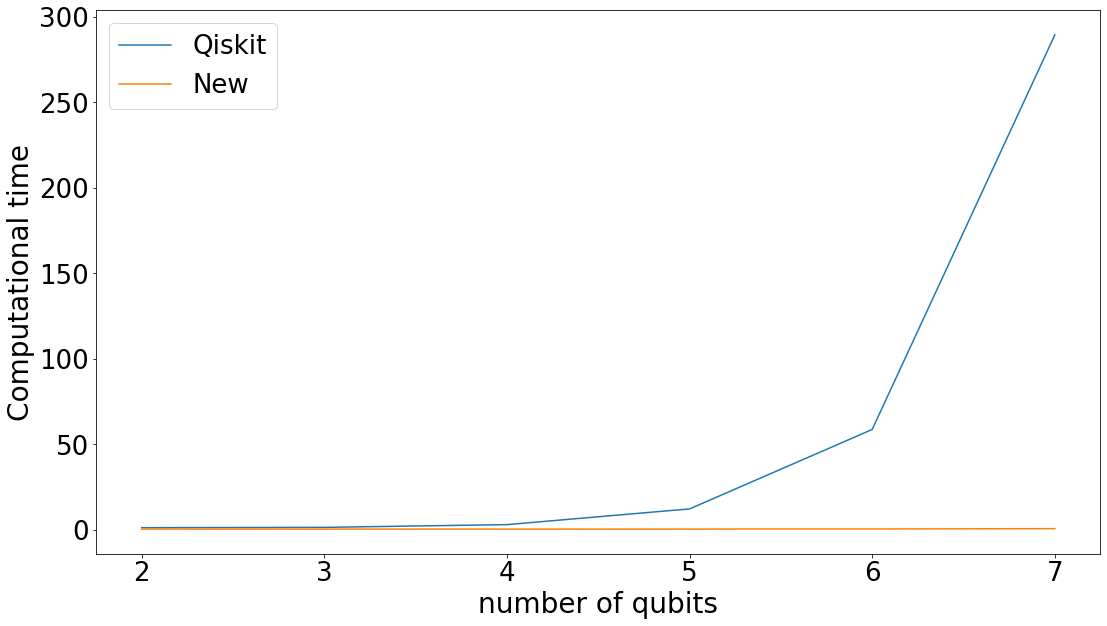

In [11]:
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
rcParams.update({'font.size': 26})
plt.xlabel('number of qubits',fontsize=28)
plt.ylabel('Computational time',fontsize=28, color='black')

plt.plot(range(2,8),told, label='Qiskit')
plt.plot(range(2,8),tnew, label='New')
plt.legend()
plt.show()